# An Introduction to Mutal Fund Comparison  
## Taylor Conkle - IS 3073.001

# About this Notebook  
  
This notebook gives an introductory analysis to mutual funds. First, we will look at three stocks from the airline sector of the economy. Next, we will look at three of the top performing internet serviecs on the web today. There are essentially three seperate mutaul funds that are analyzed, the third being a combination of the top three stocks from the first two funds.  
  
The stock data in this notebook is used from IEX, a U.S. based stock exchange.

## *Getting the Notebook Ready...  *
  
A few import statements are done here to prepare the notebook for essential dataframe use, calculations, and plotting methods.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

# Mutual Fund 01 – *Airlines*  
  
For this mutual fund, I have chosen three airlines to analyze. The air transportation industry is in high demand these days. Each day, hundreds of thousands of flights leave in and out of airports around the world. This sector provides for steadily growing stocks.  
  
We will be looking at SkyWest Airlines, Delta Airlines, and United Airlines. 

First, let's get the data from IEX.

In [2]:
start = '2014-01-01'
end   = '2018-12-01'

skyw = web.DataReader(name = 'SKYW', data_source = 'iex', start = start, end = end)  # SkyWest
skyw.reset_index(inplace = True)
dal  = web.DataReader(name = 'DAL', data_source = 'iex', start = start, end = end)   # Delta
dal.reset_index(inplace = True)
ual  = web.DataReader(name = 'UAL', data_source = 'iex', start = start, end = end)   # United
ual.reset_index(inplace = True)

Now that we have the data from IEX in seperate dataframes, we can merge them into one single dataframe to create the mutual fund. Before that happens, the dataframes should be formatted to only include the information that we will use right now (*Trade Date and Opening Price*).

In [3]:
# Slicing of non-essential columns

skyw  = skyw[['date','open']]
dal   = dal[['date','open']]
ual   = ual[['date','open']]

# Merging dataframes into 1 mutual fund

mfund1 = pd.merge(skyw,dal, on = 'date')
mfund1 = pd.merge(mfund1,ual, on = 'date')

Here is a sample of how the raw mutal fund currently looks...

In [4]:
mfund1.head()

,date,open_x,open_y,open
0,2014-03-05,12.1441,32.0193,45.42
1,2014-03-06,12.0868,32.2122,47.59
2,2014-03-07,12.3539,32.8186,48.22
3,2014-03-10,12.2585,32.4695,47.71
4,2014-03-11,12.4589,32.2122,46.63


To make the dataframe be more interpretable and appealing, we should rename the columns and set the index to Trade Date.  
  
**Side Note**: The, to be, 'Trade Date' column is initially in string format. For re-sampling that we will perform later on, this column should be converted to *datetime* format.

In [5]:
# Rename columns

mfund1.rename(columns = {'date':'Trade Date','open_x':'SkyWest','open_y':'Delta','open':'United'}, inplace = True)

# Convert Trade Date to datetime format

mfund1['Trade Date'] = pd.to_datetime(mfund1['Trade Date'])

# Set Trade Date as index

mfund1.set_index('Trade Date', inplace = True)


mfund1.head()

,SkyWest,Delta,United
Trade Date,,,
2014-03-05,12.1441,32.0193,45.42
2014-03-06,12.0868,32.2122,47.59
2014-03-07,12.3539,32.8186,48.22
2014-03-10,12.2585,32.4695,47.71
2014-03-11,12.4589,32.2122,46.63


That's much better. Now, let's have a look at what our stock prices look like on a graph.

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


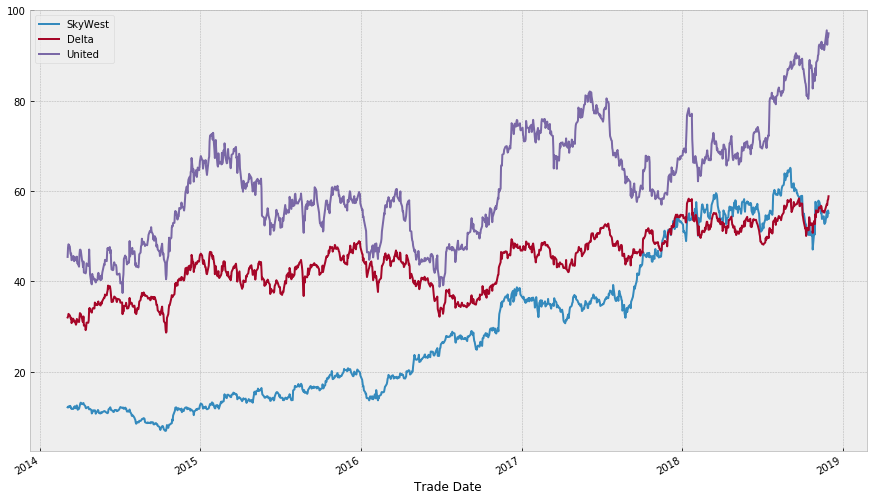

In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
style.use('bmh')
mfund1.plot()

As you can see above, United Airlines looks to be out performing the other airlines on the basis of stock price. Not to be confused, this is only the *price* of the stock at one point in time. To make a better assumption, we should look at the returns of the stocks. The return of a stock will tell us how profitable it has been over time.

Populating the interactive namespace from numpy and matplotlib


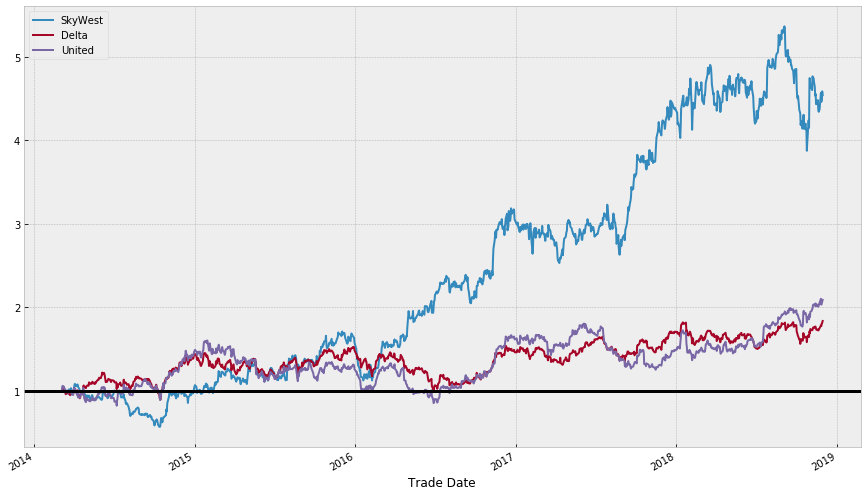

In [7]:
# Calculating stock returns

return1 = mfund1.apply(lambda x: x / x[0])

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

return1.plot(grid = True).axhline(y = 1, color = 'black', lw = 3)  # Adds bold line at y = 1

In [8]:
return1.tail()

,SkyWest,Delta,United
Trade Date,,,
2018-11-26,4.568136,1.783949,2.103919
2018-11-27,4.461327,1.777437,2.033686
2018-11-28,4.494191,1.810311,2.071995
2018-11-29,4.586211,1.814343,2.070454
2018-11-30,4.540205,1.837913,2.089388


By graphing the returns, we see that United Airlines is not the golden stock we initially assumed it to be. SkyWest is now out performing the others on the basis of *stock return*. Not only is it out performing the others, but it is doing so at a substantial amount and rate. Many investors usually look at stock returns before making any other decisions. Of course, so many other factors go into choosing the best stock to invest in when playing the stock market game competitively.

## *Benchmarking*  
  
Benchmarking is a concept and stategy used when comapring stock prices. This method is essentially a way to look at the overall performance of the "market". A great example of a benchmark is the S&P 500. The Standard & Poor's 500 is a market *index* of 500 U.S. companies that have common stock posted on the NYSE and NASDAQ stock exchanges. The index values listed for the S&P 500 are basically averages of all of these company's stock prices overtime. The averages are used for a basis of the U.S. stock market performance at any given time.  

In this case, our benchmark will consist of the averages of the three airline stocks. The dataset will be re-sampled at this time to reflect end-of-month prices.

In [9]:
# Calculate and add Benchmark

return1['Benchmark'] = return1.mean(axis = 1)

In [10]:
# Re-sample by month

mfund1BM = return1[['SkyWest','Delta', 'United', 'Benchmark']].resample('M').mean()
mfund1BM.head()

,SkyWest,Delta,United,Benchmark
Trade Date,,,,
2014-03-31,0.995645,0.985848,1.001877,0.994457
2014-04-30,1.007482,0.997717,0.960255,0.988485
2014-05-31,0.918395,1.101502,0.912803,0.977567
2014-06-30,0.938475,1.151371,0.975268,1.021705
2014-07-31,0.945917,1.086194,0.966675,0.999595


We can now visualize the stocks returns compared to the benchmark.

Populating the interactive namespace from numpy and matplotlib


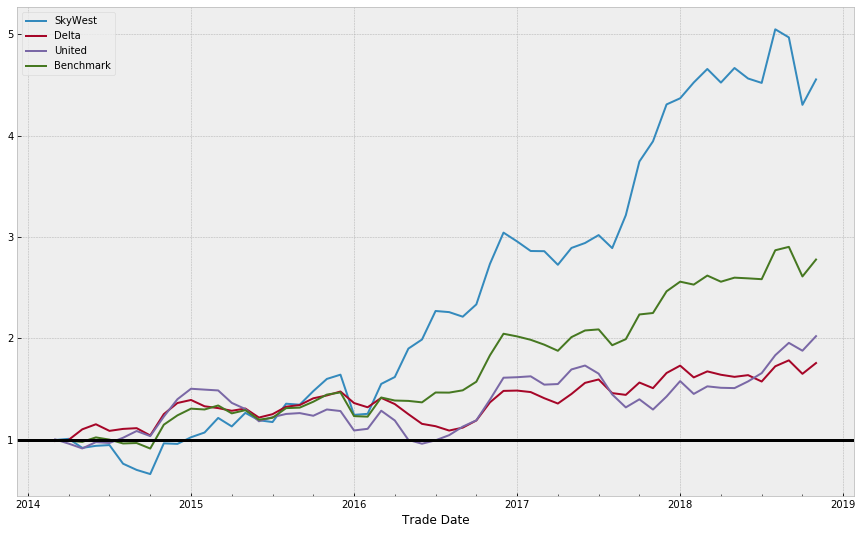

In [11]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

mfund1BM.plot(grid = True).axhline(y = 1, color = 'black', lw = 3)

Delta and United are both below the benchmark as we get closer to today's date. SkyWest will definitely be one of the stocks listed in the the final mutual fund.  
  
At this point, we have done a rather small comparison on these stocks. As an introductory stock market game player, this is good information to have. There are many other ways to look at these stocks and predict the best ones. Later, in the third mutual fund, we will look at some of those methods of predicting and selecting a good stock to invest in.  
  
Next, we look at our second mutual fund–*internet services*.

# Mutual Fund 02 – *Internet Services*  
  
So many people have been using the internet for a complete range of services. The use of the internet is not limitied to humans, as machines and small devices around the world use internet services without us giving it a second thought. I chose this sector because of the mere fact that I, an avid internet user, would like to keep using the internet. By this, I mean that if a substantial amount of interest and use comes from something, why not invest in it? Investing gives one the opportunity to theoretically allow profits to the service of choice. Investing is also a way to express interest in a sector, company, service, stock, etc.  
  
The stocks I chose to analyze for this sector are some of the most well known–Google, Twitter, and Amazon.  
  
We will be performing the same steps above, just with slightly less annotations.

In [12]:
start = '2014-01-01'
end   = '2018-12-01'

googl = web.DataReader(name = 'GOOGL', data_source = 'iex', start = start, end = end)
googl.reset_index(inplace = True)
twtr  = web.DataReader(name = 'TWTR', data_source = 'iex', start = start, end = end)
twtr.reset_index(inplace = True)
amzn  = web.DataReader(name = 'AMZN', data_source = 'iex', start = start, end = end)
amzn.reset_index(inplace = True)

In [13]:
# Slicing of non-essential columns

googl = googl[['date','open']]
twtr  = twtr[['date','open']]
amzn  = amzn[['date','open']]

# Merging dataframes into 1 mutual fund

mfund2 = pd.merge(googl,twtr, on = 'date')
mfund2 = pd.merge(mfund2,amzn, on = 'date')

Here is a sample of how the raw mutal fund currently looks...

In [14]:
mfund2.head()

,date,open_x,open_y,open
0,2014-03-05,608.1325,54.53,364.13
1,2014-03-06,611.7511,54.91,374.05
2,2014-03-07,614.0134,55.18,374.58
3,2014-03-10,608.4528,54.09,372.69
4,2014-03-11,607.4919,54.16,370.99


In [15]:
# Rename columns

mfund2.rename(columns = {'date':'Trade Date','open_x':'Google','open_y':'Twitter','open':'Amazon'}, inplace = True)

# Convert Trade Date to datetime format

mfund2['Trade Date'] = pd.to_datetime(mfund2['Trade Date'])

# Set Trade Date as index

mfund2.set_index('Trade Date', inplace = True)

In [16]:
mfund2.head()

,Google,Twitter,Amazon
Trade Date,,,
2014-03-05,608.1325,54.53,364.13
2014-03-06,611.7511,54.91,374.05
2014-03-07,614.0134,55.18,374.58
2014-03-10,608.4528,54.09,372.69
2014-03-11,607.4919,54.16,370.99


Populating the interactive namespace from numpy and matplotlib


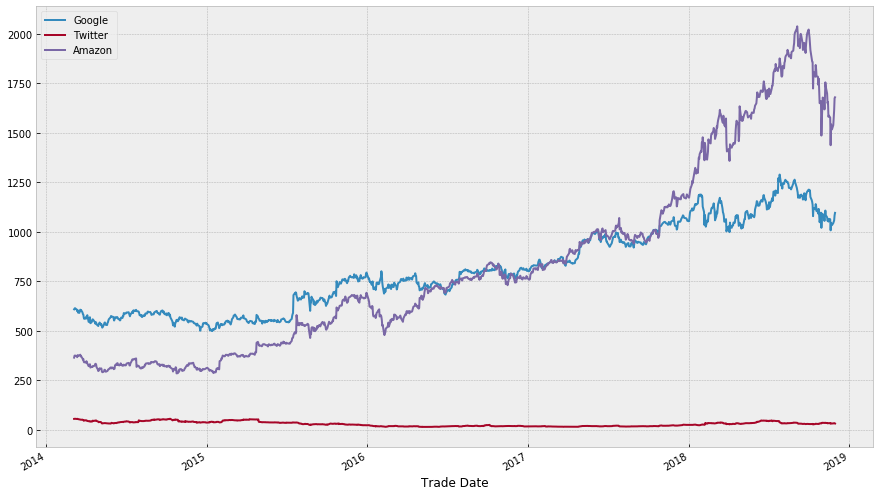

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
style.use('bmh')
mfund2.plot()

Here is what our stock prices in mutual fund 02 look like on a plot. Twitter's stock price seems to be fairly low and stable compared to Google and Amazon. Amazon's stock price is much higher than Google's and Twitter's. We should check the returns on the stocks to see which of these will be worthy of going into the third mutual fund.

Populating the interactive namespace from numpy and matplotlib


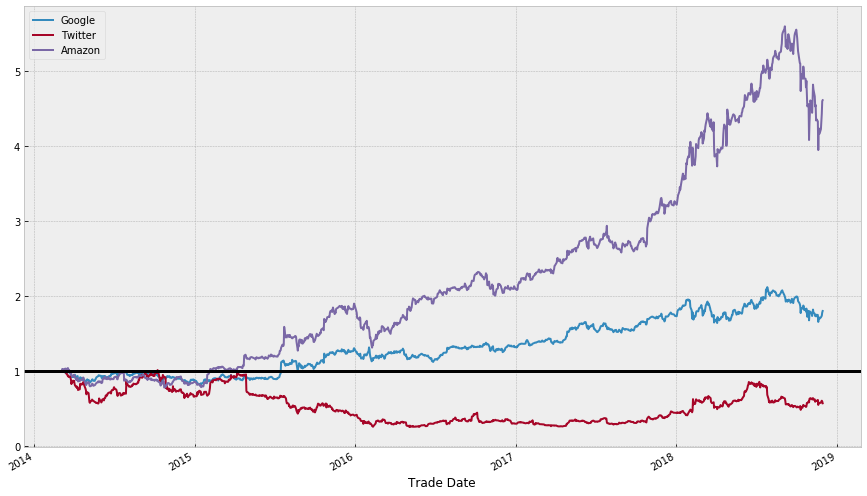

In [18]:
# Calculating stock returns

return2 = mfund2.apply(lambda x: x / x[0])

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

return2.plot(grid = True).axhline(y = 1, color = 'black', lw = 3)  # Adds bold line at y = 1

In [19]:
return2.tail()

,Google,Twitter,Amazon
Trade Date,,,
2018-11-26,1.716731,0.579448,4.226513
2018-11-27,1.728801,0.594902,4.328097
2018-11-28,1.738864,0.605171,4.432263
2018-11-29,1.781733,0.595269,4.599978
2018-11-30,1.801630,0.571245,4.612364


The graphical representation of returns looks almost the same as the original graph with stock prices. Again, Amazon is outperforming Google and Twitter by a substantial amount.  
  
Amazon is a company known very well around the U.S. and surrounding areas. Most people know the company as an online shopping platform. Not only does Amazon provide these services, the company also provides platforms for home and major business services. This looks like a great stock to invest in (if we have the funds to do so).

In [20]:
# Calculate and add Benchmark

return2['Benchmark'] = return2.mean(axis = 1)

In [21]:
# Re-sample by month

mfund2BM = return2[['Google','Twitter', 'Amazon', 'Benchmark']].resample('M').mean()
mfund2BM.head()

,Google,Twitter,Amazon,Benchmark
Trade Date,,,,
2014-03-31,0.977407,0.944878,1.003482,0.975256
2014-04-30,0.903381,0.800547,0.887409,0.863779
2014-05-31,0.891287,0.614638,0.830677,0.778867
2014-06-30,0.931784,0.671208,0.891110,0.831367
2014-07-31,0.975203,0.723163,0.929966,0.876111


Populating the interactive namespace from numpy and matplotlib


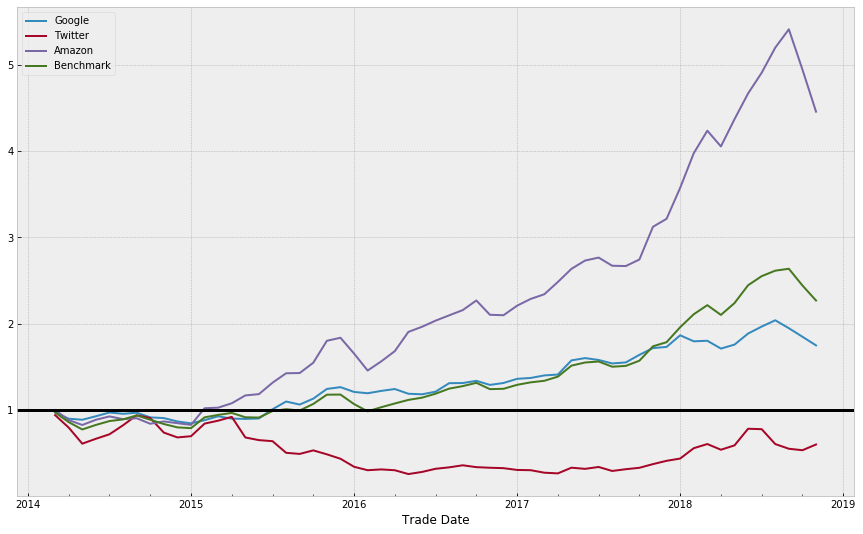

In [22]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

mfund2BM.plot(grid = True).axhline(y = 1, color = 'black', lw = 3)

It is safe to say that we shoud leave Twitter out of the range of consideration for the third mutual fund. The returns for this stock are below average and have a steady decrease. Although it seems as if there may be hope for the company's stock in the future, we will leave it behind for now.

# The Decision: *Which Stocks to Take to Mutal Fund 03*  
  
We have now looked at our two raw mutual funds. There are a few promising stocks, based soley off of return, but we want to choose the absolute best performing stocks that are at hand. Let's graphically compare the two funds once more before making a decision.

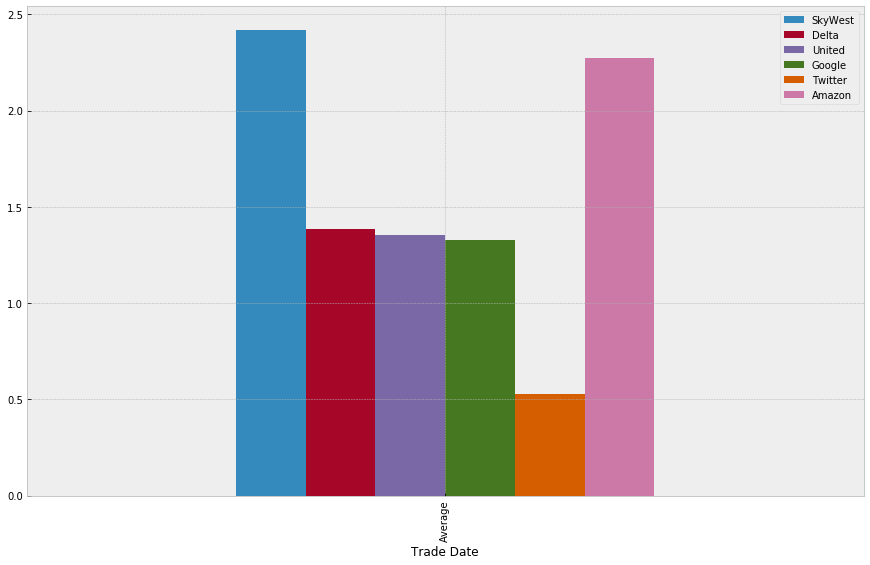

In [23]:
# Merge returns 1 & 2 into one dataframe

allreturns = pd.merge(return1,return2, on = 'Trade Date')

# Slicing of non-essential columns

allreturns = allreturns.drop(columns = {'Benchmark_x', 'Benchmark_y'})

# Make a new column for return average

allreturns.loc['Average'] = allreturns.mean()

# Re-set and set index to 'Trade Date'

allreturns.reset_index(inplace = True)
allreturns.set_index('Trade Date', inplace = True)
allreturns = allreturns.loc[['Average']]

allreturns.plot.bar()

The top 3 stocks that will make way to the third mutual fund will be SkyWest, Delta, and Amazon.

# Mutual Fund 03 – *The 'Best' of the Best*

The stocks analyzed in this section are: *SkyWest Airlines, Delta Airlines, and Amazon.*  
  
For a starter in the stock market world, this mutual fund would be great. It is comprised of stocks that have proven to outperform the others in the previous two mutual funds. Now, instead of just focusing on the return value of stocks, we'll take a look at some of the other ways to analyze stocks using python.

## *Benchmarking*  
  
We already know the returns of our stocks. Let's take a look at the returns for the chosen stocks against their benchmark on a graph.  
  
First, a new dataframe needs to made from the previous two mutual funds. The columns will be sliced to only include the data needed.

In [24]:
# Merging dataframes into 1 mutual fund

mfund3 = pd.merge(mfund1,mfund2, on = 'Trade Date')

# Slicing of non-essential data

mfund3 = mfund3.drop(columns = {'United', 'Google', 'Twitter'})

# Calculating stock returns

return3 = mfund3.apply(lambda x: x / x[0])

#### The tail-end prices of the stocks...

In [25]:
mfund3.tail()

,SkyWest,Delta,Amazon
Trade Date,,,
2018-11-26,55.4759,57.1208,1539.00
2018-11-27,54.1788,56.9123,1575.99
2018-11-28,54.5779,57.9649,1613.92
2018-11-29,55.6954,58.0940,1674.99
2018-11-30,55.1367,58.8487,1679.50


#### The tail-end returns of the stocks...

In [26]:
return3.tail()

,SkyWest,Delta,Amazon
Trade Date,,,
2018-11-26,4.568136,1.783949,4.226513
2018-11-27,4.461327,1.777437,4.328097
2018-11-28,4.494191,1.810311,4.432263
2018-11-29,4.586211,1.814343,4.599978
2018-11-30,4.540205,1.837913,4.612364


In [27]:
# Calculate and add Benchmark

return3['Benchmark'] = return3.mean(axis = 1)

# Re-sample by month

mfund3BM = return3[['SkyWest', 'Delta', 'Amazon', 'Benchmark']].resample('M').mean()

#### The tail-end returns of the stocks *with the benchmark*

In [28]:
mfund3BM.tail()

,SkyWest,Delta,Amazon,Benchmark
Trade Date,,,,
2018-07-31,4.520477,1.573208,4.905681,3.666455
2018-08-31,5.049583,1.723363,5.195831,3.989592
2018-09-30,4.969559,1.782154,5.408067,4.053260
2018-10-31,4.304007,1.649206,4.942276,3.631830
2018-11-30,4.554912,1.755763,4.455342,3.588672


Populating the interactive namespace from numpy and matplotlib


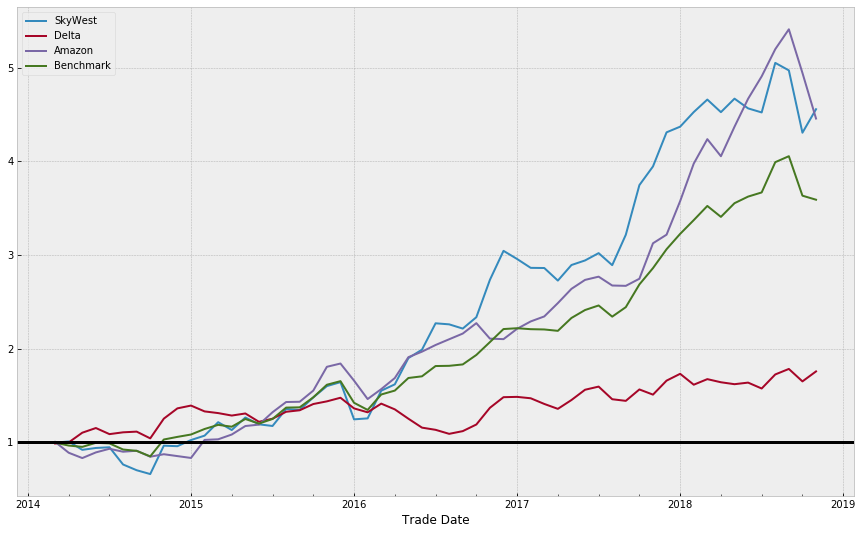

In [29]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

mfund3BM.plot(grid = True).axhline(y = 1, color = 'black', lw = 3)

In terms of the benchmarked returns, Amazon and SkyWest are the top performers, increasing rapidly in recent years. On the other hand, Delta appears to have a slow, yet steady increase.  
  
Stock return has been the main focus of the notebook thus far. Next, moving averages will be implented to give a logical understanding of how the prices of the stocks are moving.

### *The Moving Average*  
  
The moving averge technique is an application of *smoothing* data and helps analyze trends better. A small, or fast, moving average follows the trend of the data more closely and is not so stable. Whereas a large, or slow, moving average will respond less to fluctuations in the data.  
  
To show this, a 20 day (fast) moving average will be executed first and a 200 (slow) day moving average will be calculated.  
  
**Side Note:** If you are someone new to the stock market and are looking to invest, you would probably focus more on the slow moving average to have a concrete understanding of what the price of the stock is doing.

In [30]:
# Moving average dataframe for ea. stock

mfund3_ma = mfund3

# Calculate and add 20Day & 200Day MA's

mfund3_ma['skyw_20DayMA']  = np.round(mfund3['SkyWest'].rolling(window = 20, center = False).mean(), 2)
mfund3_ma['skyw_200DayMA'] = np.round(mfund3['SkyWest'].rolling(window = 200, center = False).mean(), 2)

mfund3_ma['dal_20DayMA']   = np.round(mfund3['Delta'].rolling(window = 20, center = False).mean(), 2)
mfund3_ma['dal_200DayMA']  = np.round(mfund3['Delta'].rolling(window = 200, center = False).mean(), 2)

mfund3_ma['amzn_20DayMA']  = np.round(mfund3['Amazon'].rolling(window = 20, center = False).mean(), 2)
mfund3_ma['amzn_200DayMA'] = np.round(mfund3['Amazon'].rolling(window = 200, center = False).mean(), 2)

When the moving average is applied, some of the data becomes unavailable (which is the point of the moving average). The dataframe should be cleansed of these null values.

In [31]:
mfund3_ma.head()

,SkyWest,Delta,Amazon,skyw_20DayMA,skyw_200DayMA,dal_20DayMA,dal_200DayMA,amzn_20DayMA,amzn_200DayMA
Trade Date,,,,,,,,,
2014-03-05,12.1441,32.0193,364.13,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-06,12.0868,32.2122,374.05,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-07,12.3539,32.8186,374.58,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-10,12.2585,32.4695,372.69,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-11,12.4589,32.2122,370.99,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Dropping na data

mfund3_ma = mfund3.dropna()

# Display the clean dataframe

mfund3_ma.head()

,SkyWest,Delta,Amazon,skyw_20DayMA,skyw_200DayMA,dal_20DayMA,dal_200DayMA,amzn_20DayMA,amzn_200DayMA
Trade Date,,,,,,,,,
2014-12-16,11.1632,44.2834,304.35,11.64,10.66,42.30,35.45,321.29,325.24
2014-12-17,10.4106,42.0831,296.37,11.59,10.65,42.39,35.50,319.91,324.90
2014-12-18,11.1342,42.8967,304.01,11.55,10.65,42.48,35.55,318.75,324.55
2014-12-19,11.2886,42.9614,296.91,11.56,10.64,42.60,35.60,317.40,324.16
2014-12-22,11.5491,44.1725,301.94,11.56,10.64,42.77,35.66,315.72,323.81


We are now able to graph the data with the moving averages. This step will be done individually for each stock.

#### SkyWest Stock Prices *Against the Moving Average...*

Populating the interactive namespace from numpy and matplotlib


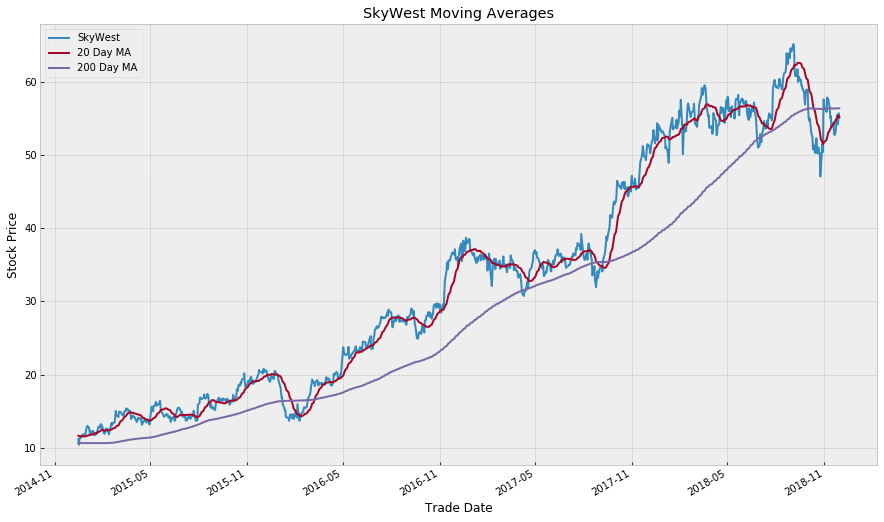

In [33]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

mfund3_ma['SkyWest'].plot(ax = ax1, label = "SkyWest")
mfund3_ma['skyw_20DayMA'].plot(ax = ax1, label = "20 Day MA")
mfund3_ma['skyw_200DayMA'].plot(ax = ax1, label = "200 Day MA")

plt.title('SkyWest Moving Averages')
plt.ylabel('Stock Price')
plt.legend()

A slow moving average is known to act as a 'floor' for the stock price. You can see above, that the 200 day moving average is much more stable compared to the 20 day moving average.

#### Delta Stock Prices *Against the Moving Average...*

Populating the interactive namespace from numpy and matplotlib


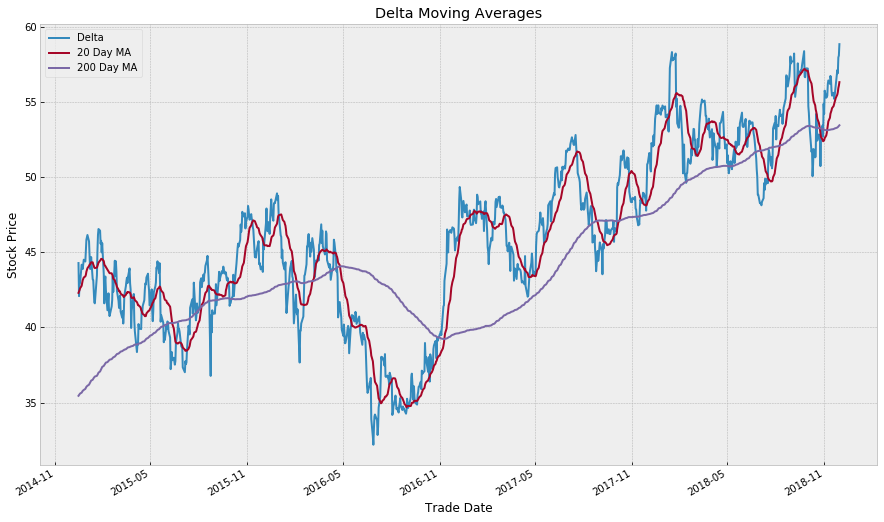

In [34]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

mfund3_ma['Delta'].plot(ax = ax1, label = 'Delta')
mfund3_ma['dal_20DayMA'].plot(ax = ax1, label = "20 Day MA")
mfund3_ma['dal_200DayMA'].plot(ax = ax1, label = "200 Day MA")

plt.title('Delta Moving Averages')
plt.ylabel('Stock Price')
plt.legend()

#### Amazon Stock Prices *Against the Moving Average...*

Populating the interactive namespace from numpy and matplotlib


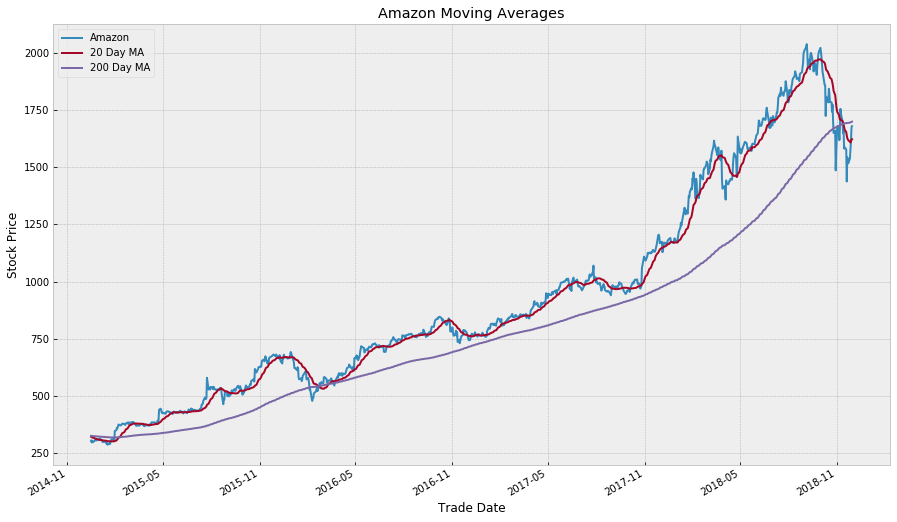

In [35]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

mfund3_ma['Amazon'].plot(ax = ax1, label = "Amazon")
mfund3_ma['amzn_20DayMA'].plot(ax = ax1, label = "20 Day MA")
mfund3_ma['amzn_200DayMA'].plot(ax = ax1, label = "200 Day MA")

plt.title('Amazon Moving Averages')
plt.ylabel('Stock Price')
plt.legend()

Amazon has a wonderful slow moving average. It has stable increase over time and a high price increase in the recent years. Plus, the price is substantially high, at just over $2,000 mid 2018. Delta seemed to have suffered a huge loss early 2016, which brings the moving average down. This company needs time to re-cooperate financially (which was done in less than a year).

### *Using Logarithmic Differences*  
  
Using a log scale when looking at stock prices gives an advantage to the experienced and non-experienced stock purchaser. Log differences are interpreted as the percent change in the price of stock for a certain period of time.  
  
Although we will examine each stock's log differences, recall the drop in the price of Delta's stock price in early 2016. A concrete example of this, with log differences, will be explained.

In [36]:
# Dataframe for log differences

mfund3_log = mfund3.apply(lambda x: np.log(x) - np.log(x.shift(1)))

# Slicing of non-essential data

mfund3_log = mfund3_log.drop(columns = {'skyw_20DayMA', 'skyw_200DayMA', 'dal_20DayMA',
                                        'dal_200DayMA', 'amzn_20DayMA', 'amzn_200DayMA'})

# Re-sample by year

mfund3_logY = mfund3_log[['SkyWest','Delta', 'Amazon']].resample('Y').mean()

# Drop na data
mfund3_logY = mfund3_logY.dropna()

#### The log difference table...

In [37]:
mfund3_logY

,SkyWest,Delta,Amazon
Trade Date,,,
2014-12-31,0.000159,0.001716,-0.000746
2015-12-31,0.001679,0.000150,0.003133
2016-12-31,0.002607,-0.000066,0.000440
2017-12-31,0.001457,0.000624,0.001727
2018-12-31,0.000147,0.000310,0.001513


When re-sampled by year, the log differences show that the relative price of all the stock are increasing over the years, with the expception of Delta's loss in 2016. Graphing a log table with little information is not very useful. To fix this, the dataframe will be re-sampled by month.

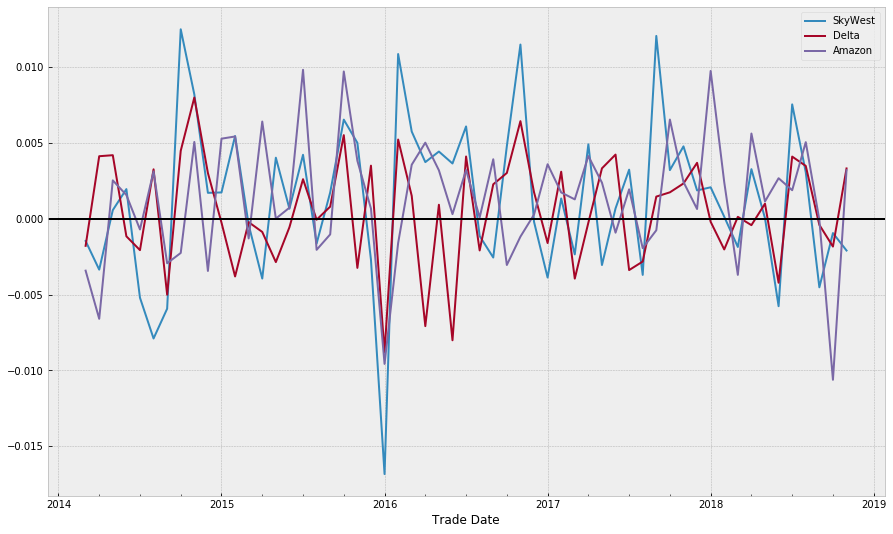

In [38]:
# Re-sample by month

mfund3_logM = mfund3_log[['SkyWest','Delta', 'Amazon']].resample('M').mean()

# Drop na data

mfund3_logM = mfund3_logM.dropna()

# Plot of re-sampled log differences

mfund3_logM.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

Certain time frames of the date can be sliced to show a zoomed in picture of the log differences. Here, we look at the years 2016 - 2018 specifically.

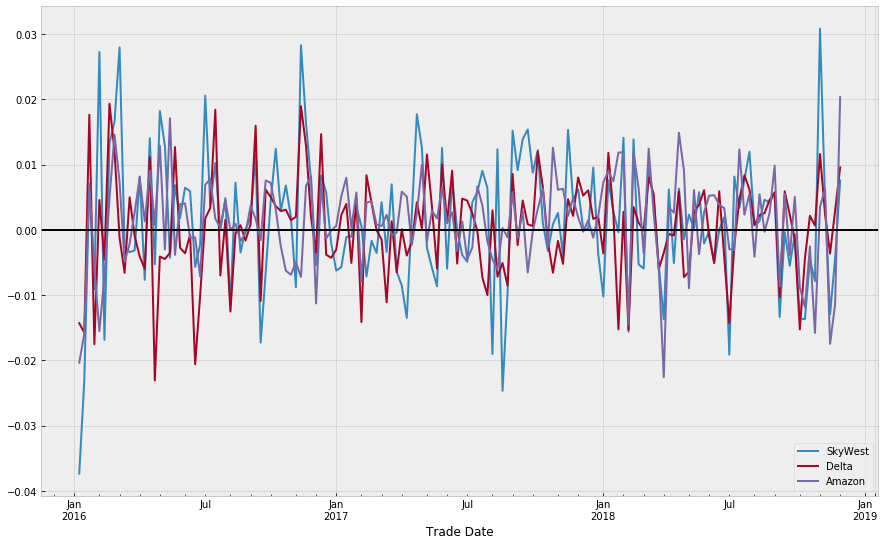

In [39]:
# Re-sample by week

mfund3_logW = mfund3_log[['SkyWest','Delta', 'Amazon']].resample('W').mean()

# Slicing of non-essential data

mfund3_logW = mfund3_logW.loc['2016-01-08':'2018-12-08',:]

# Drop na data

mfund3_logW = mfund3_logW.dropna()

# Plot of re-sampled log differences

mfund3_logW.plot(grid = True).axhline(y = 0, color = "black", lw = 2)

### *Using and Vizualizing Correlation Tables*  
  
Correlation is used to show the effect or degree of movement between two variables. When looking for stocks and mutual funds to invest in, this can be particulary handy. But why? Assume you're interested in two mutual funds that have 2 stocks in each. A correlation coefficient is run on each mutual fund. One of the funds appears to have a positive correlation in the same direction between the stocks. The other fund has a negative correlation between the two. If you were smart, and did a bit of learning previously, you would purchase the fund with the two positive correlations to maximize your chance of profit. Here's an example.

In [40]:
# Slicing of non-essential data

mfund3_corr = mfund3.drop(columns = {'skyw_20DayMA', 'skyw_200DayMA', 'dal_20DayMA',
                                     'dal_200DayMA', 'amzn_20DayMA', 'amzn_200DayMA'})

# Calculating correlation

mfund3_corr = mfund3_corr.corr()

#### The correlation table...

In [41]:
mfund3_corr

,SkyWest,Delta,Amazon
SkyWest,1.000000,0.828273,0.962310
Delta,0.828273,1.000000,0.805489
Amazon,0.962310,0.805489,1.000000


You can see that SkyWest and Amazon have the highest correlation, which means these are probably the most promising stocks from this mutual fund. Delta has a lower correlation between the other two, but it is nonetheless still on the higher side and is promising.

### *Using the S&P 500 for Comparison*  
  
Recall towards the beginning of this notebook when the S&P 500 was mentioned. Here, the comparison of the mutual fund can be compared to the overall U.S. stock market. Doing this will show the relative performance of each stock to the S&P 500. This is benchmarking on steroids.  
  
Data for the S&P is used from IEX, a U.S. based stock exchange.

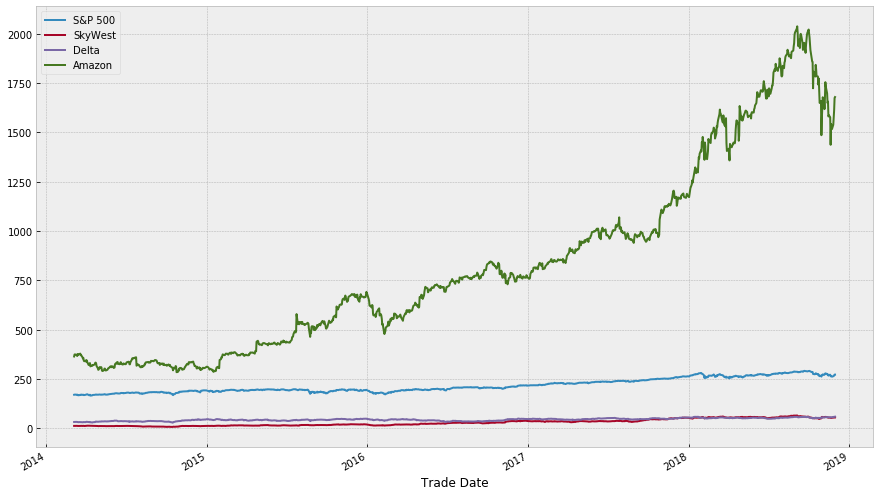

In [42]:
# Get data from IEX

start = '2014-01-01'
end   = '2018-12-01'

sp500 = web.DataReader(name='SPY', data_source='iex', start=start, end=end)
sp500.reset_index(inplace=True)

# Slicing of non-essential columns

sp500 = sp500[['date','open']]

# Re-name columns

sp500 = sp500.rename(columns= {'date' : 'Trade Date', 'open' : 'S&P 500'})

# Convert 'Trade Date' to datetime format

sp500['Trade Date'] = pd.to_datetime(sp500['Trade Date'])

# Set index to 'Trade Date'

sp500.set_index('Trade Date', inplace=True)

# Merging dataframes into 1 mutual fund

sp500 = pd.merge(sp500,mfund3, on='Trade Date')

# Slicing of non-essential columns

sp500 = sp500.drop(columns = {'skyw_20DayMA', 'skyw_200DayMA', 'dal_20DayMA',
                              'dal_200DayMA', 'amzn_20DayMA', 'amzn_200DayMA'})

sp500.plot()

We can clearly see that Amazon is pushing new limits in overall stock price performance, but what about on stock return?

In [43]:
# Calculate returns

sp500 = sp500.apply(lambda x: x / x[0])

#### S&P 500 Comparison: *Stock Returns*

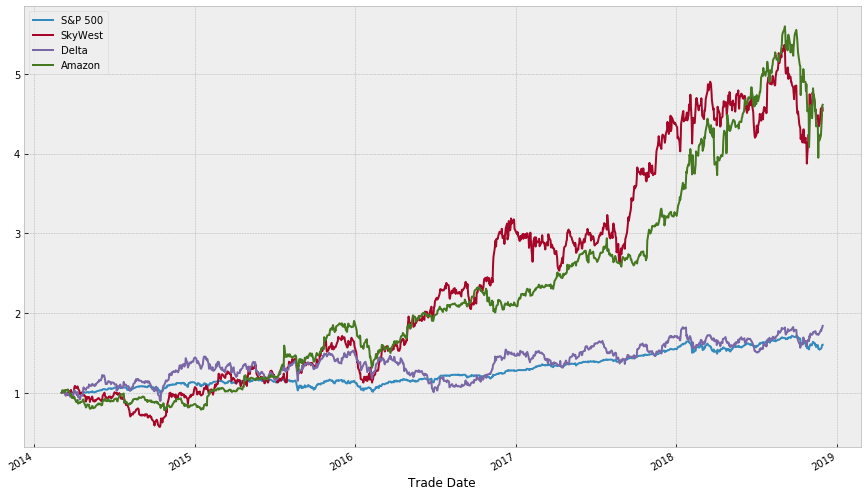

In [44]:
sp500.plot()

## Conclusion  
  
Up to this point, we have seen many ways in which a stock or mutual fund can be analyzed. Using python for stock analysis puts the user at an advantage, even when there may be sites that do these things for you. It is the learning curve that you experience while doing this that puts you ahead.  
  
In simple terms, we created three mutual funds. One fund from the air transportation industry, one from the internet services sector, and a third from the top three performing stocks from the two initial funds. The stocks that made it to the final fund are SkyWest Airlines, Delta Airlines, and Amazon. As of right now, Amazon is the leader in price performance and relative return on investment. Amazon and SkyWest Airlines pair well according to the correlation coefficient. Overall, these three stocks are great for new investors with some money to spend.